In [15]:
import xarray as xr
import random
import datetime

In [42]:
ds = xr.open_zarr("/Net/Groups/BGI/work_1/scratch/fluxcom/upscaling_inputs/MODIS_VI_perRegion061/EVI/Groups_EVIgapfilled_QCdyn.zarr")

/tmp/ipykernel_2731504/3789137383.py:1: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = xr.open_zarr("/Net/Groups/BGI/work_1/scratch/fluxcom/upscaling_inputs/MODIS_VI_perRegion061/EVI/Groups_EVIgapfilled_QCdyn.zarr")


In [43]:
ds_vi = ds.EVIgapfilled_QCdyn#.stack({'lat':['latchunk','latstep_modis'], 'lon':['lonchunk','lonstep_modis']})
# Load the dataset
#lat_indices = random.choices(ds_vi.lat.values, k=3000)
#lon_indices = random.choices(ds_vi.lon.values, k=3000)
#ds_vi.isel(time=1).values

In [44]:
ds_vi.lon.values[500]

AttributeError: 'DataArray' object has no attribute 'lon'

(array([3.0900000e+02, 1.4270000e+03, 1.4253637e+07, 1.6617208e+07,
        4.3680760e+06, 1.7998000e+04, 5.1000000e+01, 5.8000000e+01,
        7.1000000e+01, 1.6200000e+02]),
 array([-0.76004606, -0.45912984, -0.15821362,  0.14270261,  0.44361883,
         0.74453509,  1.04545128,  1.34636748,  1.64728379,  1.94819999,
         2.24911618]),
 <BarContainer object of 10 artists>)

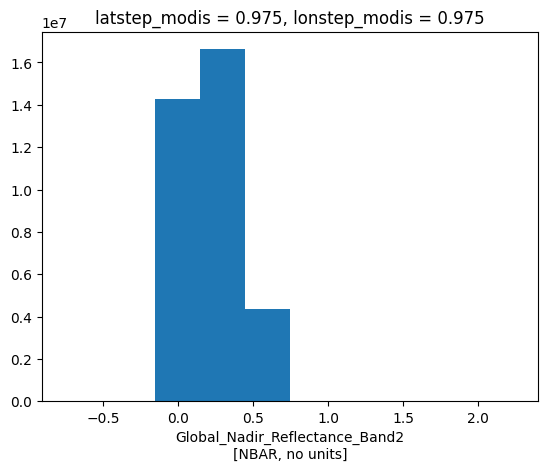

In [46]:
ds_vi.sel(latstep_modis=50.0, lonstep_modis=11, method='nearest').plot()

In [65]:
ds = xr.open_zarr("/Net/Groups/BGI/work_1/scratch/fluxcom/upscaling_inputs/MODIS_VI_perRegion061/NDVI/Groups_dyn_NDVI_MSC_snowfrac.zarr")
ds.Groups_dyn_NDVI_MSC_snowfrac

/tmp/ipykernel_2290269/400879718.py:1: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = xr.open_zarr("/Net/Groups/BGI/work_1/scratch/fluxcom/upscaling_inputs/MODIS_VI_perRegion061/NDVI/Groups_dyn_NDVI_MSC_snowfrac.zarr")


<xarray.DataArray 'Groups_dyn_NDVI_MSC_snowfrac' (doy: 366, latchunk: 90,
                                                  latstep_modis: 40,
                                                  lonchunk: 180,
                                                  lonstep_modis: 40)>
dask.array<open_dataset-8f50d49605c438148e4d9cd65a06c99cGroups_dyn_NDVI_MSC_snowfrac, shape=(366, 90, 40, 180, 40), dtype=float32, chunksize=(366, 1, 40, 1, 40), chunktype=numpy.ndarray>
Coordinates:
  * doy            (doy) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
  * latchunk       (latchunk) float64 89.0 87.0 85.0 83.0 ... -85.0 -87.0 -89.0
  * latstep_modis  (latstep_modis) float64 0.975 0.925 0.875 ... -0.925 -0.975
  * lonchunk       (lonchunk) float64 -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * lonstep_modis  (lonstep_modis) float64 -0.975 -0.925 -0.875 ... 0.925 0.975
Attributes:
    add_offset_err:    0.0
    calibrated_nt:     5
    hdf_name:          Nadir_Reflectance_Band2
    long_name:         Global_Nadir_Reflectance_Band2
    scale_factor_err:  0.0
    units:             NBAR, no units
    valid_range:       0

In [66]:
ds_msc = ds.Groups_dyn_NDVI_MSC_snowfrac.stack({'lat':['latchunk','latstep_modis'], 'lon':['lonchunk','lonstep_modis']})

In [212]:
ds_msc.sel(lat=lat_indices[500], lon=lon_indices[500]).values

KeyError: 71.25

In [187]:
lat_indices = random.choices(ds_pei.latitude.values, k=1000)
lon_indices = random.choices(ds_pei.longitude.values, k=1000)

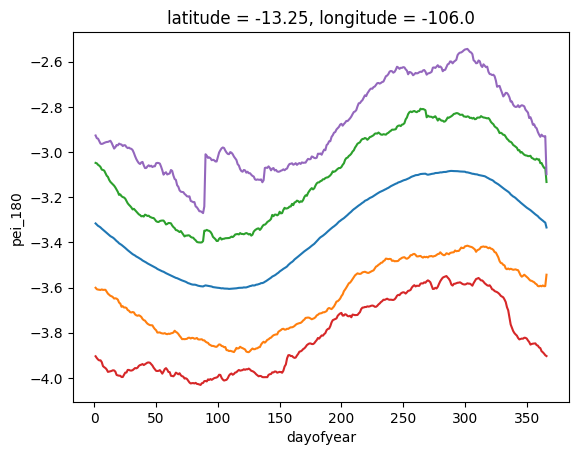

In [222]:
#select a location 
pei = ds_pei.sel(latitude=lat_indices[500], longitude=lon_indices[500], time=slice(datetime.date(1950,1,1), datetime.date(2022,12,31))).pei_180

# plot the seasonality
pei.groupby("time.dayofyear").mean("time").plot()
pei.chunk(dict(time=-1)).groupby("time.dayofyear").quantile(q=0.05, dim="time").plot()
pei.chunk(dict(time=-1)).groupby("time.dayofyear").quantile(q=0.95, dim="time").plot()
pei.groupby("time.dayofyear").min("time").plot()
pei.groupby("time.dayofyear").max("time").plot()


In [3]:
# Load the PEI-* drought indices
ds = xr.open_zarr("/Net/Groups/BGI/scratch/mweynants/DeepExtremes/v3/PEICube.zarr")

# Transform the longitude coordinates to -180 and 180
def coordstolongitude(x):
       return ((x + 180) % 360) - 180
dsc = ds.roll(longitude = 180*4, roll_coords=True)
ds_pei = dsc.assign_coords(longitude = coordstolongitude(dsc.longitude))
# Remove the year 1950 because the data are inconsistent
ds_pei = ds_pei.sel(time=slice(datetime.date(1951,1,1), datetime.date(2022,12,31)))

# Select k locations randomly to train the PCA:
lat_indices = random.choices(ds_pei.latitude.values, k=10)
lon_indices = random.choices(ds_pei.longitude.values, k=10)
ds_pei = ds_pei.sel(latitude=lat_indices, longitude=lon_indices)

# Stack the longitude and latitude dimensions into a new dimension called lonlat
ds_pei = ds_pei.stack(lonlat=('longitude', 'latitude')).transpose('lonlat', 'time', ...)

# compute the MSC
for pei_indice in ['pei_30', 'pei_90', 'pei_180']:
    ds_pei[f'msc_{pei_indice}'] = ds_pei[pei_indice].groupby("time.dayofyear").mean("time")

In [18]:
for i in ds_pei.data_vars:
    print(i)

pei_180
pei_30
pei_90
msc_pei_30
msc_pei_90
msc_pei_180


PCA(n_components=10)

In [88]:
pca.explained_variance_ratio_[:5]

array([0.63044574, 0.28205099, 0.03906764, 0.02449689, 0.01613243])

<BarContainer object of 73 artists>

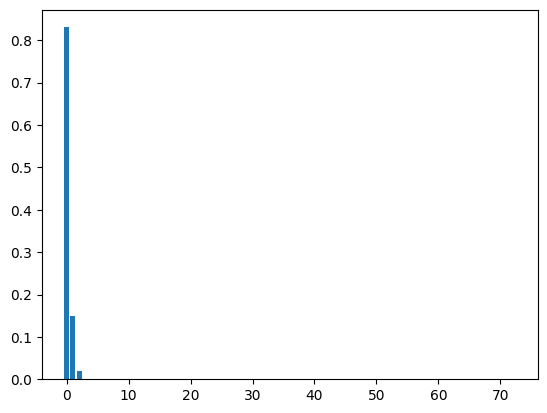

In [63]:
import matplotlib.pyplot as plt
plt.bar(range(n_components), pca.explained_variance_ratio_)